In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


#Define ODE model
def surfaceReactionModel(t, y, params):
    
    alpha = params[0]
    gamma = params[1]
    kappa = params[2]
                  
    DyDt = alpha * (1 - y) - gamma * y - kappa*(1 - y)**2 * y
    
    return DyDt

y0 = 0.89
kappa= 10.0
tspan = np.linspace(0,25,50)

#Generate random parameters
n_samples = 10000
xi1 = np.random.randn(n_samples)
alphas = 0.1 + np.exp(0.05 * xi1)
                      
xi2 = np.random.randn(n_samples)
gammas = 0.001 + 0.01 * np.exp(0.05 * xi2)

sols = []

for i in range(n_samples):

    sol = solve_ivp(surfaceReactionModel, [tspan[0], tspan[-1]], [y0], args=[[alphas[i], gammas[i], kappa]], t_eval=tspan)
    sols.append(sol.y.flatten())


In [2]:
## Generate labels (0 downward, 1 upward)

#Indicator function
def indicator_func(x, threshold):
    
    if x[-1] < threshold:  
        label = 0
    else: 
        label = 1
    return label

#Generate labels for each trajectory
labels = []

for i in range(n_samples):
    labels.append(indicator_func(sols[i], 0.9))

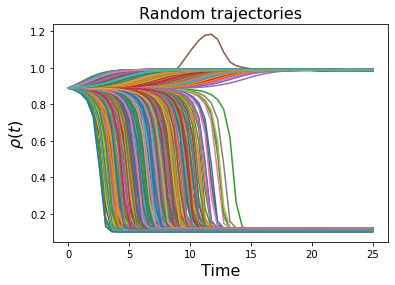

In [8]:
for i in range(n_samples):
    plt.plot(tspan, sols[i])
    plt.xlabel('Time', fontsize = 16)
    plt.ylabel(r'$\rho(t)$', fontsize = 16)
    plt.title('Random trajectories', fontsize = 16)

In [9]:
def compute_probabilities(labels):
    
    n_samples = len(labels)
    n_upward = labels.count(1)
    n_downward = n_samples - n_upward

    P_up = n_upward/n_samples
    P_down = 1 - P_up
    
#     print(f'Probability of upward trajectory: {P_up}')
#     print(f'Probability of downward trajectory: {P_down}')
    
    return P_up, P_down

Probability of upward trajectory: 0.7427
Probability of downward trajectory: 0.2573


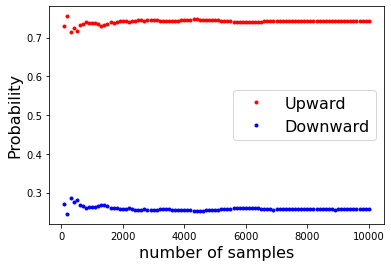

In [13]:
## Convergence analysis
min_samples = 100
delta_samples = 100
sample_range = np.linspace(min_samples, n_samples, int(n_samples/delta_samples), dtype = np.int32).tolist()
for i in sample_range:
    
    P_up, P_down = compute_probabilities(labels[0:i])
    
    plt.plot(i,P_up,'r.')
    plt.plot(i,P_down,'b.')
    
plt.xlabel('number of samples', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.legend(['Upward', 'Downward'], fontsize = 16)

print(f'Probability of upward trajectory: {P_up}')
print(f'Probability of downward trajectory: {P_down}')    
    

In [6]:
## Store data
import json

data_dict = {}
filename = 'surface_reaction_data_lowres.json'

for i in range(n_samples):
    data_dict[f'sample{i+1}'] = {'data':sols[i].tolist(), 'time': tspan.tolist(), 'label':labels[i]}
    

with open(filename, 'w') as fp:
    json.dump(data_dict, fp)

In [7]:

import torch
a = torch.tensor(data_dict[f'sample{0+1}']['data'])

In [8]:
a.shape

torch.Size([50])

In [41]:
data_dict.sample1.data

AttributeError: 'dict' object has no attribute 'sample1'